In [6]:
import os, glob
import math

import numpy as np
import pandas as pd

import matplotlib as mpl
#for use with workstation
#matplotlib.use('agg')
import matplotlib.pyplot as plt

print("Matplotlib %s" % mpl.__version__)
%matplotlib inline



dirroot = "/Users/nile/Workspace/xcode/tdQvecPostProcess/TinyTestData"
dirroot = os.environ.get("DIRROOT", dirroot)

Matplotlib 2.2.3


In [7]:

directory = "plot_slice.XZplane.V_4.Q_4.step_00000050.cut_29"

directory = os.environ.get("DIRECTORY", directory)

image = "file.vort"


filename = "%s/%s/%s.bin" % (dirroot, directory, image)


if os.path.isfile(filename):
    print("Found: %s" % filename)
else:
    print("NOT FOUND: %s" % filename)


Found: /Users/nile/Workspace/xcode/tdQvecPostProcess/TinyTestData/plot_slice.XZplane.V_4.Q_4.step_00000050.cut_29/file.vort.bin


(1764, 42, 1764, 0.0, 0.0)
(42, 42)


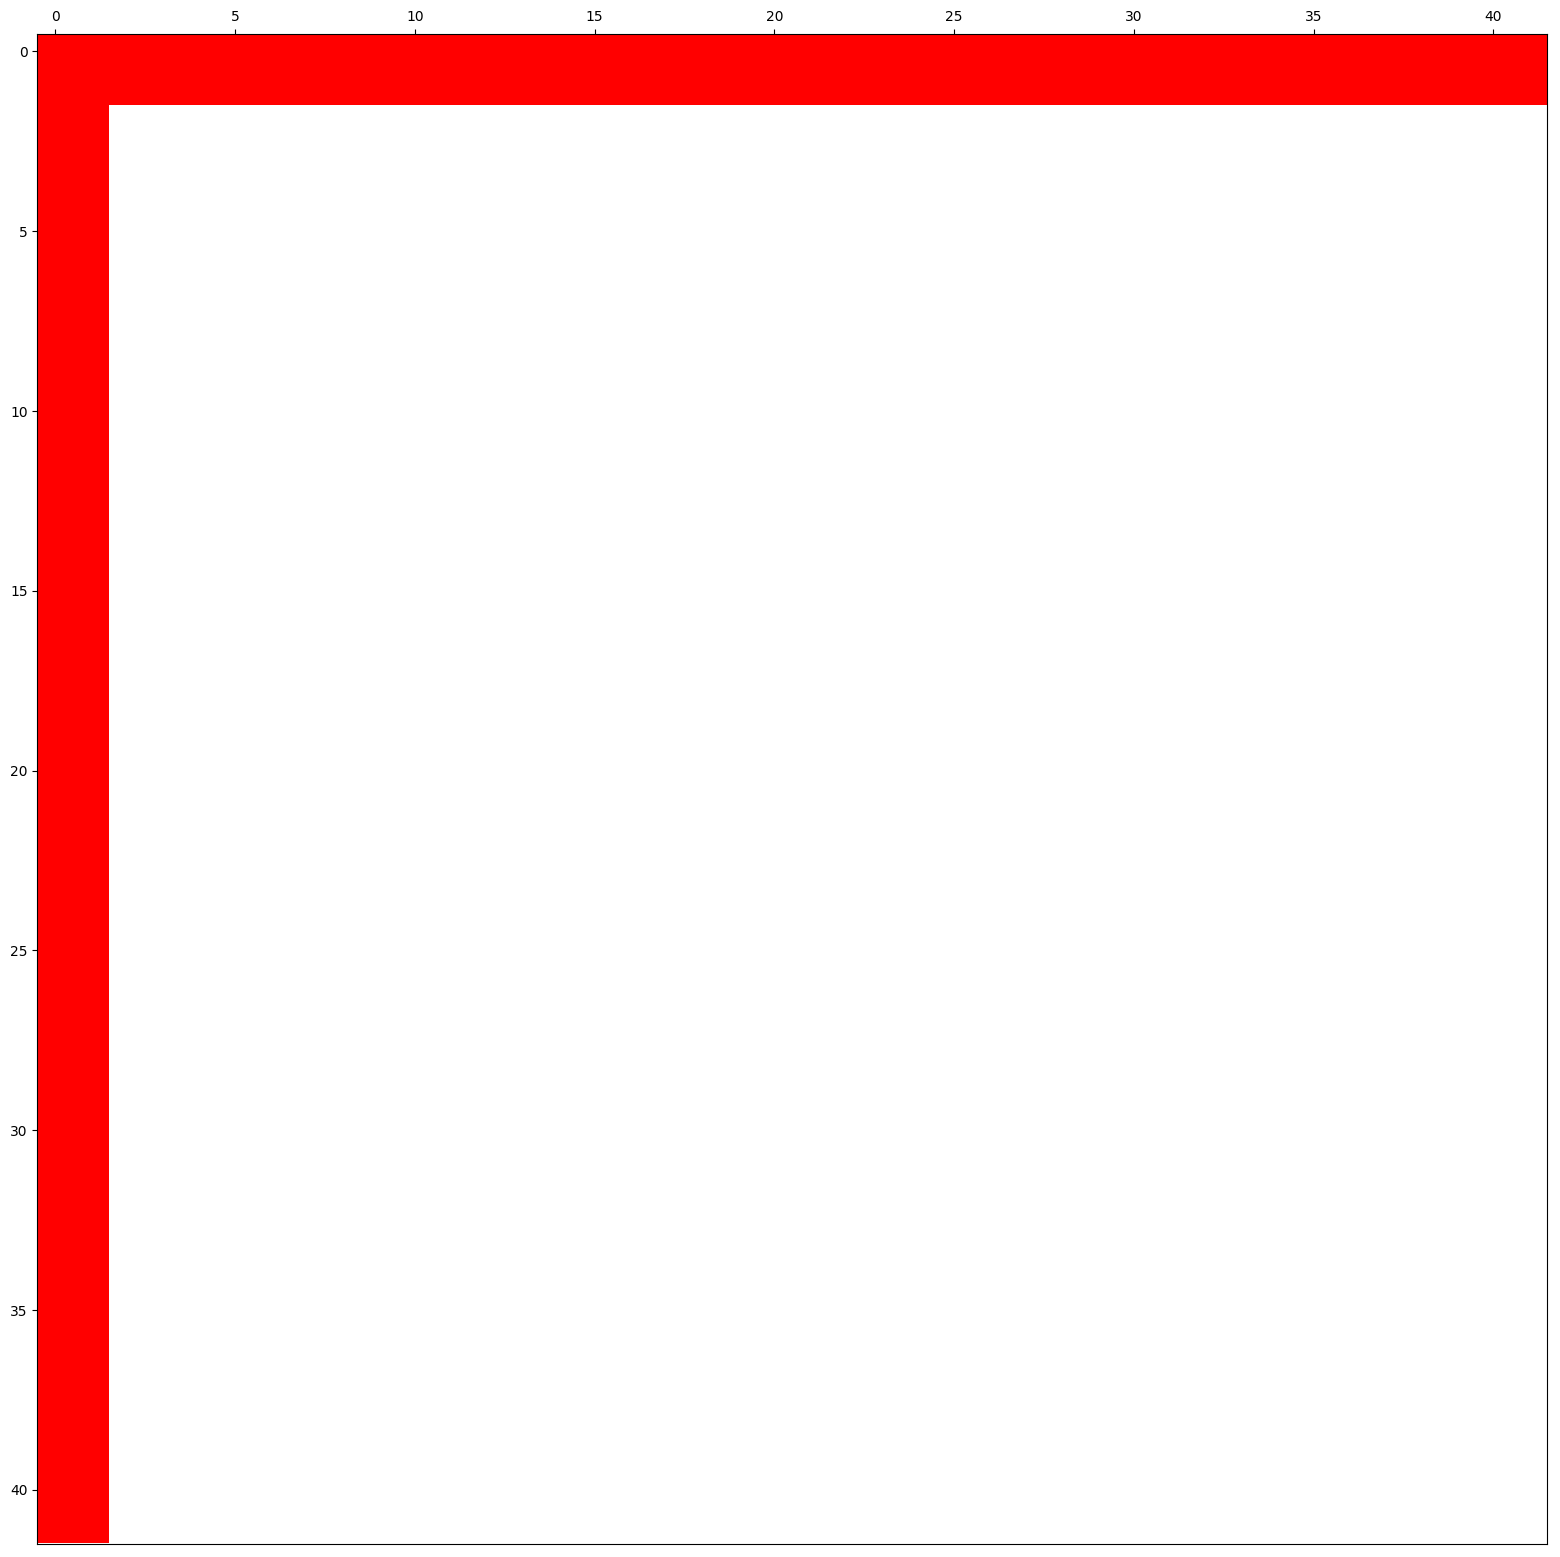

In [10]:
CONTOUR = False

d = np.fromfile(filename, dtype=np.float32)

mind = np.nanmin(d)
maxd = np.nanmax(d)


snx = int(math.sqrt(len(d)))
print(len(d), snx, snx*snx, mind, maxd)


npd = np.reshape(d,(snx,snx))
data = pd.DataFrame(npd.transpose())

print(data.shape)


DPI = 100
if CONTOUR:
    mpl_fig = plt.figure(figsize=(20, 20), dpi=DPI)
else:
    mpl_fig = plt.figure(figsize=(20, 20), dpi=DPI)
#     mpl_fig = plt.figure(figsize=(snx/DPI, snx/DPI), dpi=DPI)


    
ax = mpl_fig.add_subplot(111)
ax.invert_yaxis()
ax.xaxis.tick_top()


min = -35
max = -5
num_levels = 50


levels = np.linspace(min, max, num=num_levels)

if CONTOUR:
    contours = plt.contourf(data, num_levels, cmap=plt.cm.rainbow)
else:
    plt.imshow(data, cmap=plt.cm.rainbow, interpolation='none', vmin=-35, vmax=-5)




filepng = "%s.png" % (filename[:-4])

plt.savefig(filepng)

plt.show()